<a href="https://colab.research.google.com/github/leocraig18/Portfolio-Projects/blob/master/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Note: See in colab for non static charts.

# Introduction

In this project, I will analyse space launches from 1957-2020 and the USA vs USSR Space Race. I aim to understand how the occurrence of the Space Race affected launch patterns, as well as investigating the success rates and occurrence of launches internationally along with other variables over time. 

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [5]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

In [6]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 64.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [7]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from iso3166 import countries
from datetime import datetime, timedelta
from calendar import month_name

### Notebook Presentation

In [8]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [21]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [11]:
df_data.shape

(4324, 9)

The data has 9 columns and 4324 rows.

In [12]:
# Names of the columns.
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [13]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [14]:
df_data.tail()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [15]:
df_data.count()

Unnamed: 0        4324
Unnamed: 0.1      4324
Organisation      4324
Location          4324
Date              4324
Detail            4324
Rocket_Status     4324
Price              964
Mission_Status    4324
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

After preliminary data exploration we can see that the first two columns are acting as additional indexes and can thus be removed.
We should also check for duplicates and NaN values and consider removing them.

In [23]:
# The unnamed columns contain junk data and thus can be dropped from the df:
df_data = df_data.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
df_data.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

In [35]:
print(f"Any NaN values? {df_data.isna().values.any()}")
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any NaN values? True
Any duplicates? True


In [20]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


From this we can see that the dataframe has thousands of null data points for Price. I will not remove these rows as we can still gain insight from these rows' other variables. However, this lack of data should be acknowledged when analysing price data and its reliability.

In [36]:
df_data[df_data.duplicated()]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


We can see there is only one duplicated row in the dataset.

In [37]:
# Removing the duplicate
df_data = df_data.drop_duplicates()
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any duplicates? False


I am also going to convert the data types of the Price and Date columns.

In [40]:
# Convert Date column data from object to datetime.
df_data.Date = pd.to_datetime(df_data.Date, utc=True)

In [41]:
# Convert Price data to float from object.
  # First need to remove commas from str:
df_data.Price = df_data.Price.str.replace(',', '')
df_data.Price = df_data.Price.astype(float)


In [42]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4323 non-null   object             
 1   Location        4323 non-null   object             
 2   Date            4323 non-null   datetime64[ns, UTC]
 3   Detail          4323 non-null   object             
 4   Rocket_Status   4323 non-null   object             
 5   Price           963 non-null    float64            
 6   Mission_Status  4323 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 399.2+ KB


## Descriptive Statistics

In [ ]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


Our data suggests that from 1957-2020 the average price of space launches is 153.79 Million USD. 

# Number of Launches per Company

In [43]:
launch_organisations = df_data.groupby('Organisation').size().reset_index(name='launches')
 
launch_organisations.sort_values(by='launches', inplace=True)
top_launch_organisations = launch_organisations[-20:]

In [44]:
h_bar = px.bar(x=top_launch_organisations.launches,
               y=top_launch_organisations.Organisation,
               orientation='h',
               color=top_launch_organisations.launches,
               color_continuous_scale=px.colors.sequential.haline,
               title='Top 20 Organisations by launches.')
h_bar.update_layout(xaxis_title='Number of Launches', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)
h_bar.show()

It is evident that the USSR have attempted the most space launches by far, with nearly 1800 launches. This also tells us that the USSR's launches are concentrated to fewer organisations than the USA.

# Number of Active versus Retired Rockets

In [45]:
df_data["Rocket_Status"].value_counts()

StatusRetired    3534
StatusActive      789
Name: Rocket_Status, dtype: int64

In [46]:
status_bar = px.bar(x=df_data["Rocket_Status"].value_counts().index,
               y=df_data["Rocket_Status"].value_counts(),
               title='Number of Active versus Retired Rockets')
 
status_bar.update_layout(xaxis_title='Rocket Status', 
                    yaxis_title='Total Rockets')
status_bar.show()

It turns out the vast majority of the rockets used for launches since the 1957 have been retired and only 789 remain active as of 2020.

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [47]:
mission_success = df_data.Mission_Status.value_counts()
mission_success

Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [48]:
pie = px.pie(names=mission_success.index, values=mission_success.values,
                    title='How many missions were successful?',
                   )

pie.show()

Almost 90 percent of all missions were successful

# How Expensive are the Launches?

In [49]:
df_clean = df_data.dropna(subset=['Price'])
df_clean.shape
df_clean.describe()

,Price
count,963.00
mean,153.92
std,288.57
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


The dataframe used for this analysis has lots of missing Price values. In order to visualise the data using a histogram and Kernel density estimation I have dropped these NaN values.

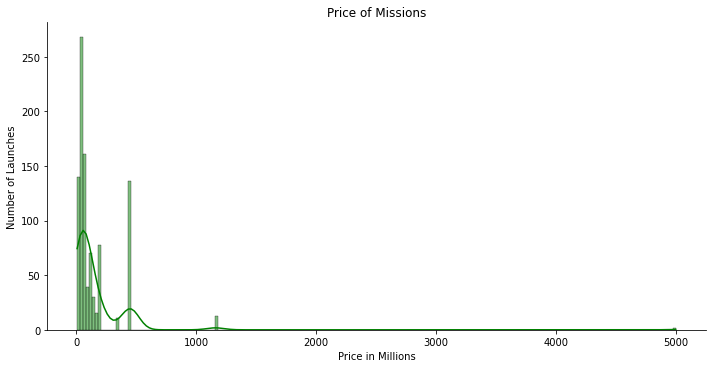

In [51]:
sns.displot(x=df_clean.Price, 
            aspect=2,
            color='green',
            kde=True)

plt.title('Price of Missions')
plt.xlabel('Price in Millions')
plt.ylabel('Number of Launches')

plt.show()


This chart is distorted due to the huge outliers on the upper end of the distribution. In order to get a better visualisation of the data I will drop this value from the dataframe temporarily.

In [53]:
df_clean_2 = df_data.dropna(subset=['Price'])
df_clean_2 = df_data[df_data['Price'] < 4500]

In [54]:
print(df_clean.shape)
df_clean_2.shape

(963, 7)


(961, 7)

Based on the shape of the data. We can see that by removing the outliers we only lose two rows. We can now revisualise our data.

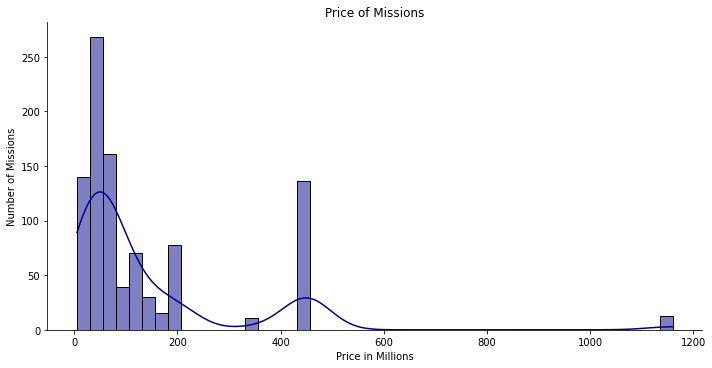

In [55]:
sns.displot(x=df_clean_2.Price,
            aspect=2,
            color='darkblue',
            kde=True)

plt.title('Price of Missions')
plt.xlabel('Price in Millions')
plt.ylabel('Number of Missions')

plt.show()

By removing prices over 1000 again we can visualise our data one more time.

(948, 7)


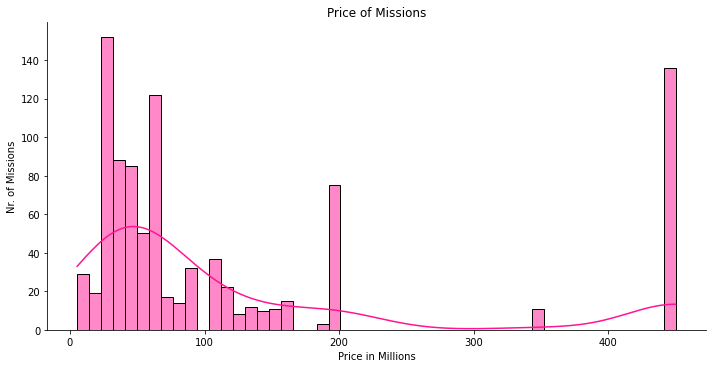

In [56]:
df_clean_3 = df_data.dropna(subset=['Price'])
df_clean_3 = df_data[df_data['Price'] < 1000]
print(df_clean_3.shape)
sns.displot(x=df_clean_3.Price,
            bins=50,
            aspect=2,
            color='deeppink',
            kde=True)

plt.title('Price of Missions')
plt.xlabel('Price in Millions')
plt.ylabel('Nr. of Missions')

plt.show()

#### We can see that the vast majority of missions costed under 200 million USD. However, there are a more than 120 missions costing over 400 million. Furthermore, there have been 15 missions costing more than 1.1 Billion USD and two of these costed 5 Billion USD. The average cost of the launches we have price data for is $153.79 Million

# Number of Launches by Country
In order to use a Choropleth Map I need to convert the Country names to ISO codes. First the names must be converted to the compatible country names as described below.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA
* South Korea should be Korea, Republic of
* North Korea should be Korea, Democratic People's Republic of.

After converting the neccessary country names I can add an ISO Code column and convert to Alpha3 codes.

In [57]:
df_data['Country'] = df_data['Location'].str.extract(',\s*([^,]+)$')
df_data.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status', 'Country'],
      dtype='object')


In addition, the launches from LP Odyssey, Kiritimati Launch Area, Pacific Ocean, do not have ISO codes as the launches took place in the oceon and were colaborated by multiple countries including Norway, Russia, Ukraine, and the United States based on my research. Read more [here:](https://en.wikipedia.org/wiki/Sea_Launch#:~:text=Sea%20Launch%20was%20established%20in,was%20launched%20in%20March%201999.)

In [58]:
df_data['Country'] = df_data['Country'].replace('New Mexico', 'USA')
df_data['Country'] = df_data['Country'].replace('Russia', 'Russian Federation')
df_data['Country'] = df_data['Country'].replace('Yellow Sea', 'China')
df_data['Country'] = df_data['Country'].replace('Shahrud Missile Test Site', 'Iran')
df_data['Country'] = df_data['Country'].replace('Pacific Missile Range Facility', 'USA')
df_data['Country'] = df_data['Country'].replace('Barents Sea', 'Russian Federation')
df_data['Country'] = df_data['Country'].replace('Gran Canaria', 'USA')
df_data['Country'] = df_data['Country'].replace('South Korea', "Korea, Republic of")
df_data['Country'] = df_data['Country'].replace("North Korea", "Korea, Democratic People's Republic of")

In [59]:
def convert_to_iso3166(name):
    try:
        return countries.get(name).alpha3
    except:
        return None


In [60]:
df_data["ISO"] = df_data['Country'].apply(lambda x: convert_to_iso3166(x))

# Using a Choropleth Map to Show the Number of Failures by Country


In [61]:
failed_missions = df_data[df_data.Mission_Status == "Failure"]

In [62]:
df_countries = failed_missions.groupby(['Country', 'ISO'], 
                               as_index=False).agg({'Mission_Status': pd.Series.count})
df_countries.rename(columns={'Mission_Status': 'Failed_Launches'}, inplace=True)
df_countries.sort_values('Failed_Launches', ascending=False)

,Country,ISO,Failed_Launches
12,USA,USA,129
7,Kazakhstan,KAZ,72
11,Russian Federation,RUS,63
2,China,CHN,19
3,France,FRA,13
6,Japan,JPN,10
4,India,IND,8
0,Australia,AUS,3
8,"Korea, Democratic People's Republic of",PRK,3
1,Brazil,BRA,2


In [63]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='Failed_Launches', 
                          hover_name='Country', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

### We can conclude that the USA has suffered the most failures since 1957. However, it should be considered that Kazakhstan was previously a member state of the Soviet Union and most of their launches occured before the USSR dissolved in 1991. Combined, Kazakhstan and Russia have suffered a total of 135 failed launches.

# Sunburst Chart of the countries, organisations, and mission status. 

In [65]:
df_data["Mission_Status_duplicate"] = df_data.Mission_Status.astype(str)
country_org_success = df_data.groupby(by=['Country', 
                                       'Organisation', 'Mission_Status'], as_index=False).agg({'Mission_Status_duplicate': pd.Series.count})
 
country_org_success = country_org_success.sort_values('Mission_Status_duplicate', ascending=False)

In [66]:
burst1 = px.sunburst(country_org_success, 
                    path=['Country', 'Organisation', 'Mission_Status'], 
                    values=country_org_success.Mission_Status_duplicate.values,
                    title='Where do launches take place and how successful are they?',
                   )
 
burst1.show()
burst2 = px.sunburst(country_org_success, 
                    path=['Organisation', 'Country', 'Mission_Status'], 
                    values='Mission_Status_duplicate',
                    title='Where do launches take place and how successful are they?',
                   )
 
burst2.show()

# Total Amount of Money Spent by Organisation on Space Missions

In [67]:
total_spent = df_data.groupby(by=['Organisation'], as_index=False).sum()
total_spent = total_spent.sort_values('Price', ascending=True)
top_spenders = total_spent[-20:]

In [68]:
h_bar = px.bar(x=top_spenders.Price,
               y=top_spenders.Organisation,
               orientation='h',
               color=top_spenders.Price,
               color_continuous_scale='Viridis',
               title='Top 20 Organisations by total spending.')
h_bar.update_layout(xaxis_title='Total Spent in Millions USD', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)
h_bar.show()

### This figure would suggest that NASA have spent significantly more than the RVSN USSR. However, this dataset only provides us with two non-zero Price data entries for RVSN USSR launches. In fact we are missing price data for most launches. This is an example of a case where the analysis is limited by the quality of the data. In order to get around this we can look at average spending for the data we do have.

# Amount of Money Spent by Organisation per Launch

In [69]:
organisation_counts = df_data.dropna().groupby('Organisation').size().reset_index(name='counts')
merged_df = pd.merge(organisation_counts, total_spent, on='Organisation')

In [70]:
merged_df['average_price'] = merged_df['Price'] / merged_df['counts']
merged_df = merged_df.sort_values('average_price', ascending=True)
top_20_average = merged_df[-20:]
top_20_average

,Organisation,counts,Price,average_price
10,Kosmotras,22,638.00,29.00
8,ISRO,67,"2,177.00",32.49
11,Lockheed,8,280.00,35.00
4,ESA,1,37.00,37.00
2,CASC,157,"6,310.51",40.19
5,Eurockot,13,543.40,41.80
23,VKS RF,33,"1,548.90",46.94
15,Northrop,83,"3,930.00",47.35
18,Roscosmos,23,"1,187.50",51.63
20,SpaceX,99,"5,444.00",54.99


In [71]:
h_bar = px.bar(x=top_20_average.average_price,
               y=top_20_average.Organisation,
               orientation='h',
               color=top_20_average.average_price,
               color_continuous_scale='Viridis',
               title='Organisations Average Price Per Launch.')
h_bar.update_layout(xaxis_title='Average in Millions USD', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)
h_bar.show()

### The price data avaliable to us suggests that RVSN USSR spending was significantly higher per launch at 5 Billion USD. However the sample size is to small to be reliable.

# Chart the Number of Launches per Year

In [72]:
df_year = df_data.groupby(df_data.Date.dt.year, as_index=False).size()
df_year = df_year.sort_values('Date', ascending=True)
df_year['moving_avg'] = df_year['size'].rolling(window=5).mean()
df_year

,Date,size,moving_avg
0,1957,3,NaN
1,1958,28,NaN
2,1959,20,NaN
3,1960,39,NaN
4,1961,52,28.40
...,...,...,...
59,2016,90,55.80
60,2017,92,66.60
61,2018,117,80.80
62,2019,109,92.00


In [73]:
year_bar = px.bar(x=df_year.Date,
               y=df_year["size"],
               title='Number of Launches Per Year')
year_bar.update_layout(xaxis_title='Year', 
                    yaxis_title='Launches',
                    coloraxis_showscale=False)
year_bar.add_trace(go.Scatter(x=df_year['Date'], y=df_year['moving_avg'], mode='lines', name='Moving Average'))
year_bar.show()

### The figure above shows that the number of launches in a single year rose significantly from the start of the Space Race and peaked in 1971. In the years following 1977, the number of launches per year fell significantly.

# Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time?

In [77]:
df_data['year'] = df_data['Date'].dt.year
df_data['month'] = df_data['Date'].dt.month
df_months = df_data.groupby('month', as_index=False).size()
# Convert months to their month name.
df_months['month'] = df_months['month'].apply(lambda x: month_name[x])
# Rename size to counts to avoid function confusions.
df_months = df_months.rename(columns={'size': 'counts'})

In [78]:
month_bar = px.bar(x=df_months.month,
               y=df_months.counts,
               title='Total Launches in each month.')
month_bar.update_layout(xaxis_title='Month', 
                    yaxis_title='Total Launches',
                    coloraxis_showscale=False)
month_bar.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [80]:
df_data['month_year'] = df_data['Date'].dt.strftime('%m/%Y')
df_month = df_data.groupby(['month_year'], as_index=False).size()
df_month.month_year = pd.to_datetime(df_month.month_year)
df_month.sort_values(by='month_year', inplace=True)
df_month['moving_average'] = df_month["size"].rolling(window=12).mean()

In [81]:
year_bar = px.scatter(x=df_month.month_year, y=df_month["size"],
                      title='Total Launches by Month')
year_bar.add_scatter(x=df_month.month_year, y=df_month["moving_average"],mode='lines',line=dict(width=1, color='Red'))
year_bar.update_layout(xaxis_title='Year', 
                    yaxis_title='Launches',
                    coloraxis_showscale=False)
year_bar.show()

### Based on the data, December is the most popular month for launches, whilst January is the least popular. The most launches of all time occured in December 1971 with 18 launches taking place.

# How has the Launch Price varied Over Time? 

In [82]:
df_data["year"] = df_data.Date.dt.year

In [83]:
df_prices = df_data.dropna(subset=['Price'])

In [84]:
df_prices.shape

(963, 13)

In [85]:
avg_price_df = df_prices.groupby('year')['Price'].mean()
avg_price_df

year
1964      63.23
1965      63.23
1966      59.00
1967     196.62
1968     279.20
1969     609.50
1970   1,160.00
1971   1,160.00
1972   1,160.00
1973   1,160.00
1981     450.00
1982     345.20
1983     366.16
1984     380.13
1985     408.08
1986     310.27
1987   1,687.20
1988   1,193.16
1989     380.83
1990     289.15
1991     391.43
1992     319.35
1993     276.73
1994     221.51
1995     325.00
1996     243.20
1997     221.74
1998     152.12
1999     128.51
2000     173.12
2001     290.70
2002     185.59
2003      80.51
2004      92.74
2005      95.79
2006     138.61
2007     125.70
2008     133.45
2009     180.29
2010     148.40
2011     146.60
2012     122.29
2013      90.55
2014     102.55
2015      91.55
2016      79.46
2017      69.49
2018      64.75
2019      59.61
2020      56.65
Name: Price, dtype: float64

In [86]:
moving_average = avg_price_df.rolling(window=5).mean()

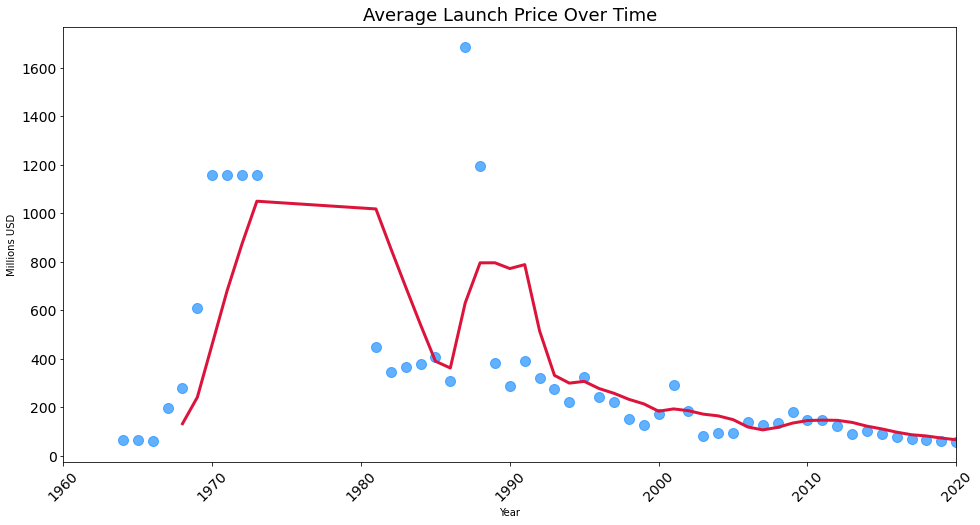

In [87]:
plt.figure(figsize=(16,8))
plt.title("Average Launch Price Over Time", fontsize=18)
plt.xlabel('Year')
plt.ylabel('Millions USD')
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1960, 2021, step=10), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1960, 2020)

ax.scatter(x=avg_price_df.index, 
           y=avg_price_df.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(avg_price_df.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

Once again, our lack of access to Price per launch launch data limits our ability to provide useful visualisations on this topic. As you can see the figure is missing all price data for launches during the peak years of the Space Race.

One thing we can infer from this visualisation is that there was a significant inflation in the USD spent per launch during the Space Race between the USSR and USA. However the reliability of this is limited.

We can see that with time our access to price data has improved. With this, the distribution around the moving average has reduced massively.

## Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [127]:
df_grouped = df_data.groupby(['Organisation', 'year']).size().reset_index(name='counts')
df_grouped

,Organisation,year,counts
0,AEB,1997,1
1,AEB,1999,1
2,AEB,2003,1
3,AMBA,1958,7
4,AMBA,1967,1
...,...,...,...
658,VKS RF,2020,3
659,Virgin Orbit,2020,1
660,Yuzhmash,1969,1
661,Yuzhmash,1991,1


In [128]:
reshaped_df  = df_grouped.pivot(index='year', columns='Organisation', values='counts')
# Add zero to all NaN cells
reshaped_df.fillna(0, inplace=True)
reshaped_df.isna().values.any()

False

In [129]:
# Get the total launches for each organization
total_launches = reshaped_df.sum()

# Get the top 10 organizations
top_10_orgs = total_launches.nlargest(10).index

# Get the columns that are not in the top 10 organizations
cols_to_drop = reshaped_df.columns.difference(top_10_orgs)

# Drop the other columns
top_10_df = reshaped_df.drop(cols_to_drop, axis=1)

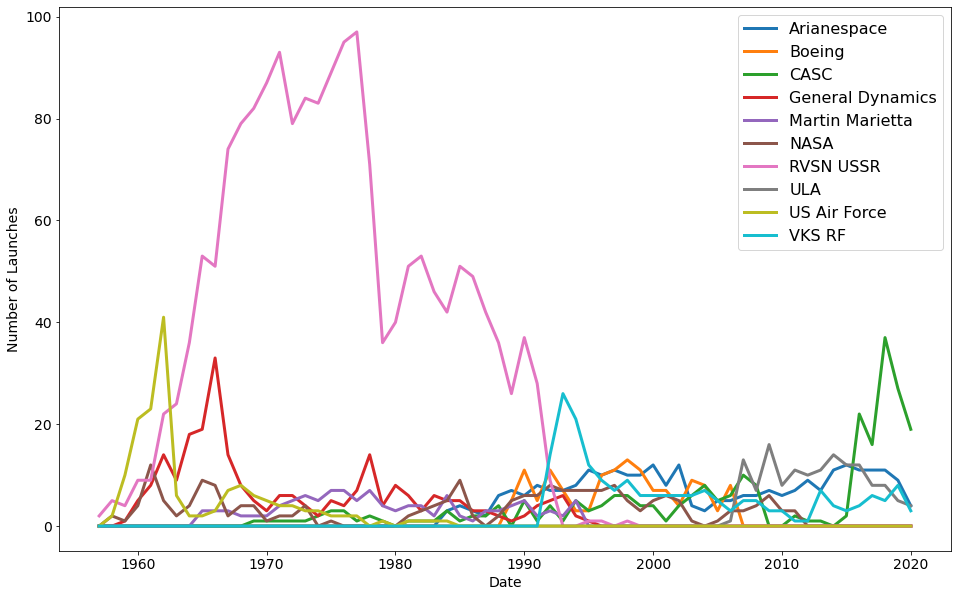

In [130]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)

for column in top_10_df.columns:
    plt.plot(top_10_df.index, top_10_df[column], linewidth=3, label=top_10_df[column].name)
plt.legend(fontsize=16) 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [131]:
df_grouped = df_data.groupby(['Country', 'year']).size().reset_index(name='counts')
reshaped_df  = df_grouped.pivot(index='year', columns='Country', values='counts')
cols_to_drop = reshaped_df.columns.difference(["USA", "Russian Federation", "Kazakhstan"])
# Drop the other columns
df = reshaped_df.drop(cols_to_drop, axis=1)
df.fillna(0, inplace=True)
df.isna().values.any()
df = df.assign(USSR=df['Russian Federation'] + df['Kazakhstan'])
df = df.drop(['Russian Federation', 'Kazakhstan'], axis=1)
df_launches = df

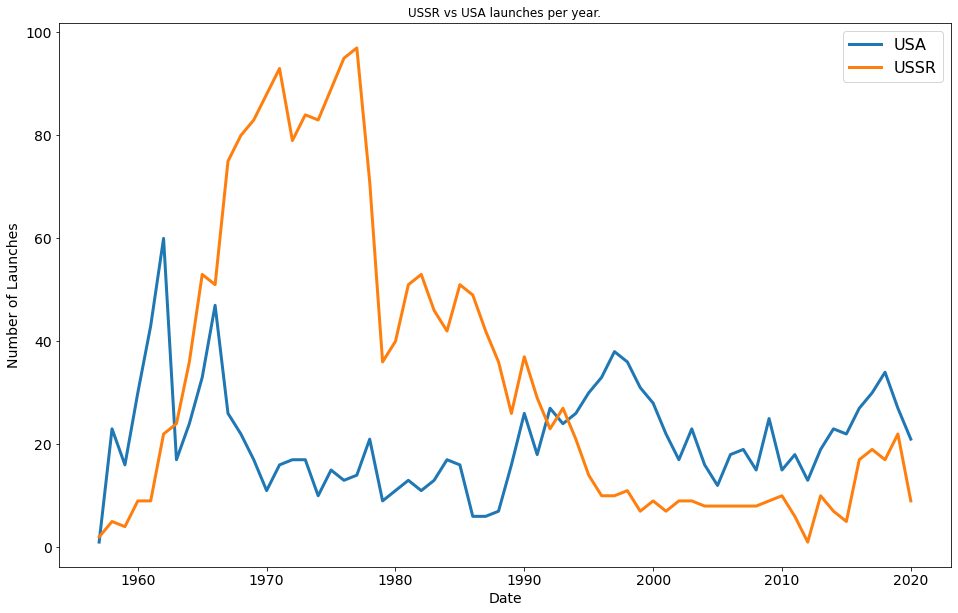

In [132]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.title('USSR vs USA launches per year.')
for column in df.columns:
    plt.plot(df.index, df[column], linewidth=3, label=df[column].name)
plt.legend(fontsize=16) 

## Total number of launches by the USSR and the USA.

In [133]:
df_cold = df_data.groupby(['Country', 'Organisation', 'year']).size().reset_index(name='counts')
df_cold = df_cold[df_cold['Country'].isin(['USA','Russian Federation', 'Kazakhstan'])]
df_cold = df_cold.drop(df_cold[df_cold['year'] > 1991].index)

In [134]:
burst = px.sunburst(df_cold, 
                    path=['Organisation', 'Country', 'year'], 
                    values='counts',
                    title='Total launches: USSR vs USA',
                   )
 
burst.show()
burst = px.sunburst(df_cold, 
                    path=['Country','Organisation', 'year'], 
                    values='counts',
                   )
 
burst.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [135]:
df_cumulative = df.cumsum()

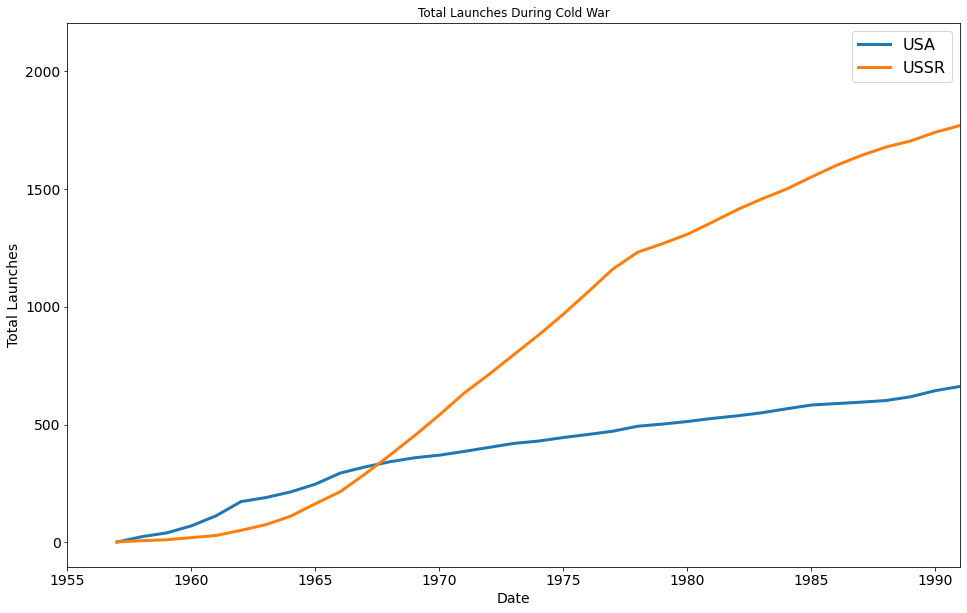

In [136]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Launches', fontsize=14)
plt.title('Total Launches During Cold War')
plt.xlim(1955, 1991)
for column in df.columns:
    plt.plot(df_cumulative.index, df_cumulative[column], linewidth=3, label=df_cumulative[column].name)
plt.legend(fontsize=16) 

## Total Number of Mission Failures Year on Year.

In [137]:
df = df_data[df_data['Mission_Status'].isin(['Failure','Prelauch Failure'])]
df = df.groupby(['Country','year'])['Mission_Status'].count().reset_index()
df.rename(columns={'Mission_Status':'Failures'}, inplace=True)
df = df[df['Country'].isin(['USA','Russian Federation', 'Kazakhstan'])]
df = df.drop(df[df['year'] > 1991].index)
df = df.pivot(index='year', columns=['Country'], values='Failures')
df = df.assign(USSR=df['Russian Federation'] + df['Kazakhstan'])
df = df.drop(['Russian Federation', 'Kazakhstan'], axis=1)
df.fillna(0, inplace=True)
df_cumulative = df.cumsum()

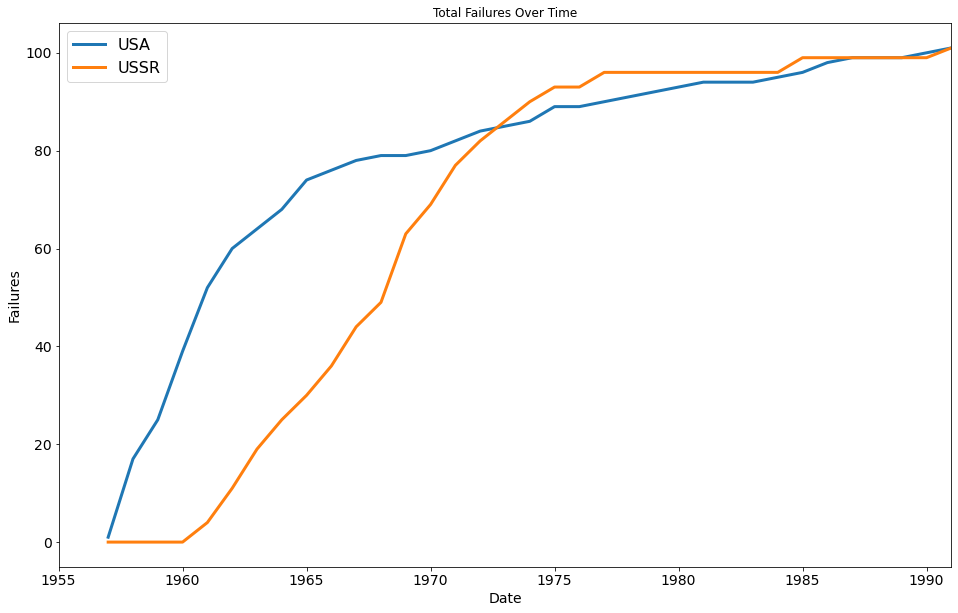

In [138]:
plt.figure(figsize=(16,10))
plt.title('Total Failures Over Time')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Failures', fontsize=14)
plt.xlim(1955, 1991)
for column in df.columns:
    plt.plot(df_cumulative.index, df_cumulative[column], linewidth=3, label=df_cumulative[column].name)
plt.legend(fontsize=16) 

The chart above shows the cumulative failures until the end of the cold war. We see that the USA suffered failures earlier than the USSR, however during the 
1960s the USSR's failures grew exponentially as their cumulative curve is convexed, before turning concaved as failures plateu towards the end of the 1970's. As we cannot see the total number of launches on this chart it may be more incitefull to plot failures as a percentage of total launches.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

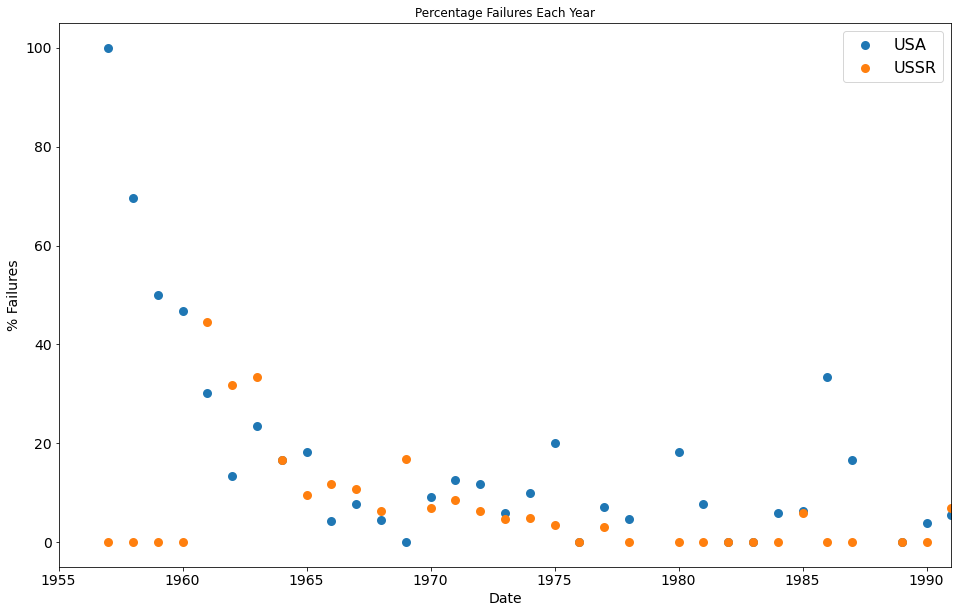

In [121]:
# Create a new dataframe with the same shape as the launches_df
percent_failures_df = df.copy()

# Divide the values in the failures_df by the corresponding values in the launches_df
percent_failures_df[['USSR', 'USA']] = df[['USSR', 'USA']] / df_launches[['USSR', 'USA']]
percent_failures_df[['USSR', 'USA']] *= 100

plt.figure(figsize=(16,10))
plt.title('Percentage Failures Each Year')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Failures', fontsize=14)
plt.xlim(1955, 1991)
for column in df.columns:
    plt.scatter(percent_failures_df.index, percent_failures_df[column], linewidth=3, label=percent_failures_df[column].name)
plt.legend(fontsize=16) 

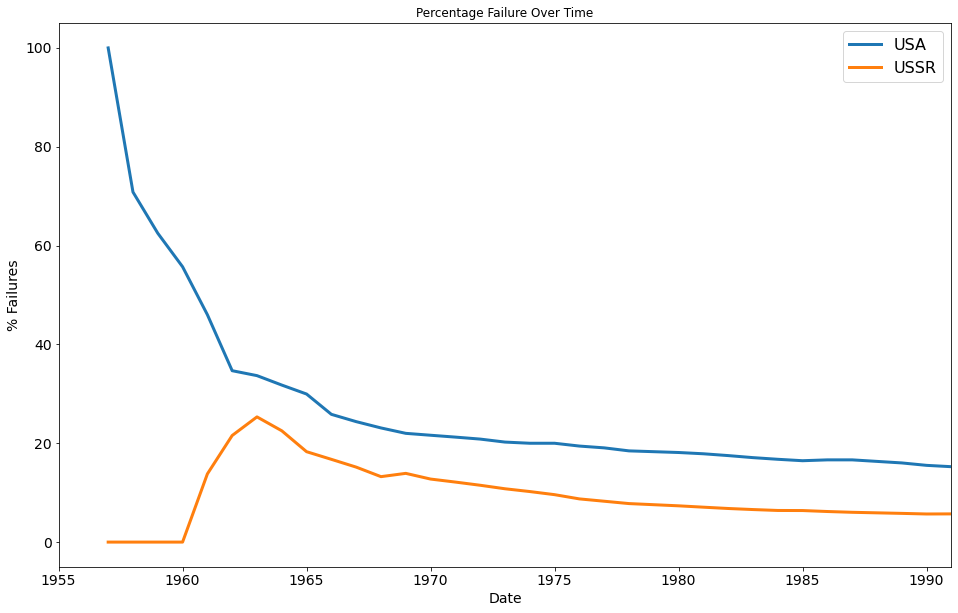

In [122]:
percent_failures_df = df.copy()

# Divide the values in the failures_df by the corresponding values in the launches_df
percent_failures_df[['USSR', 'USA']] = df[['USSR', 'USA']].cumsum() / df_launches[['USSR', 'USA']].cumsum()
percent_failures_df[['USSR', 'USA']] *= 100

plt.figure(figsize=(16,10))
plt.title('Percentage Failure Over Time')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Failures', fontsize=14)
plt.xlim(1955, 1991)
for column in df.columns:
    plt.plot(percent_failures_df.index, percent_failures_df[column], linewidth=3, label=percent_failures_df[column].name)
plt.legend(fontsize=16) 

The figures above show that the USA in fact had a worse success rate for the duration of the cold war, and the USSR's higher number of total failures is as a result of their larger cumulative launches over the time period.

# For Every Year which Country and organisation was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [123]:
# First chart.
launches_per_year_countries = df_data.groupby(['Country', 'year'], as_index=False).size()
grouped = launches_per_year_countries.groupby(['year'])
max_index = grouped['size'].idxmax()
max_df = launches_per_year_countries.loc[max_index]
launches_bar = px.bar(x=max_df.year,
               y=max_df["size"],
               orientation='v',
               color=max_df.Country,
               labels=max_df.Country,
               title='Countries with most launches each year.')
launches_bar.update_layout(xaxis_title='Year', 
                    yaxis_title='Launches',
                    coloraxis_showscale=False)
launches_bar.show()

# Filter for successful launches
successful_launches = df_data[df_data['Mission_Status'] == 'Success']

# Second chart.
launches_per_year_countries = successful_launches.groupby(['Country', 'year'], as_index=False).size()
grouped = launches_per_year_countries.groupby(['year'])
max_index = grouped['size'].idxmax()
max_df = launches_per_year_countries.loc[max_index]
launches_bar = px.bar(x=max_df.year,
               y=max_df["size"],
               orientation='v',
               color=max_df.Country,
               labels=max_df.Country,
               title='Countries with the most successful launches each year.')
launches_bar.update_layout(xaxis_title='Year', 
                    yaxis_title='Launches',
                    coloraxis_showscale=False)
launches_bar.show()

# Third chart.
launches_per_year_organisation = df_data.groupby(['Organisation', 'year'], as_index=False).size()
grouped = launches_per_year_organisation.groupby(['year'])
max_index = grouped['size'].idxmax()
max_df = launches_per_year_organisation.loc[max_index]
launches_bar = px.bar(x=max_df.year,
               y=max_df["size"],
               orientation='v',
               color=max_df.Organisation,
               labels=max_df.Organisation,
               title='Organisation with most launches each year.')
launches_bar.update_layout(xaxis_title='Year',
                    yaxis_title='Launches',
                    coloraxis_showscale=False)
launches_bar.show()
# Fourth chart.
launches_per_year_organisation = successful_launches.groupby(['Organisation', 'year'], as_index=False).size()
grouped = launches_per_year_organisation.groupby(['year'])
max_index = grouped['size'].idxmax()
max_df = launches_per_year_organisation.loc[max_index]
launches_bar = px.bar(x=max_df.year,
               y=max_df["size"],
               orientation='v',
               color=max_df.Organisation,
               labels=max_df.Organisation,
               title='Organisation with most successful launches each year.')
launches_bar.update_layout(xaxis_title='Year',
                    yaxis_title='Launches',
                    coloraxis_showscale=False)
launches_bar.show()

## Countries with most successful launches each year.

In [124]:
successful_launches = df_data[df_data['Mission_Status'] == 'Success']
launches_per_year_countries = successful_launches.groupby(['Country', 'year'], as_index=False).size()
grouped = launches_per_year_countries.groupby(['year'])
max_index = grouped['size'].idxmax()
max_df = launches_per_year_countries.loc[max_index]
launches_bar = px.bar(x=max_df.year,
               y=max_df["size"],
               orientation='v',
               color=max_df.Country,
               labels=max_df.Country,
               title='Countries with the most successful launches each year.')
launches_bar.update_layout(xaxis_title='Year', 
                    yaxis_title='Launches',
                    coloraxis_showscale=False)
launches_bar.show()

# Conclusions

Based on the results of my analysis, it is evident that the Space Race significantly increased the total number of launches to present. In fact, no year since 1971 has seen more successful launches. Since the date of the first space launch in October 1957, the USA led the total number of successful launches until 1967 where they were swiftly overtaken by the USSR. From this point until the end of the cold war in 1991 the USSR led every year in terms of total successful launches resulting in them accounting for almost 75% of all launches during this time period. However, since the reversal in the early 1990s, the USA has led Russia in space launches per year. 

One interesting point is that despite the space race concluding in 1975, total launches remained high until 1978. This may have been due to a combination of factors such as the continued use of existing technology and infrastructure developed during the space race, ongoing missions planned during the space race, Cold War military and intelligence purposes and ongoing interest in space exploration and scientific research.

Another conclusion we can make is that space exploration efforts were concentrated to far fewer organisations in the USSR compared to the United States, where many organisations including General Dynamics, NASA, the US Air Force and Martin Marietta played significant roles during the cold war.

Since the 1957 we have seen the percentage of failures overtime fall. During the 1960's, the USSR suffered an increase but not above the level in the USA. From 1957 to present date, the USA has had a worse success rate than the USSR and since the ealry 1960's this gap has difference has grown larger.

The recent economic development of China under Xi Jinping can be seen in China's launch statistics in 2018 and 2019 where they led the world in total successful launches.

Finally, whilst we have gained some valuable insights from this analysis, the analysis is limited by the lakc of price data, and thus we cannot draw many valubale conclusions around launch costs, especially during the cold war period.